- **Name:** Jessica P. Apuyan
- **Term:** AY-2024-2025

# Problem Set 001: Bisection Method

As you may think, Python has the existing root-finding functions for us to use to make things easy. The function we will use to find the root is *f_solve* from the *scipy.optimize*. 

The *f_solve* function takes in many arguments that you can find in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html), but the most important two is the function you want to find the root, and the initial guess. 

**TRY IT!** Compute the root of the function $f(x) = e^{-x} - x$ using *f_solve*.

In [1]:
# Install the following package if not yet installed
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
f = lambda x: np.exp(-x) - x

x_root = fsolve(f, 0.5)[0]  # Initial guess of 0.5
print("Root: " + str(x_root))

Root: 0.5671432904097811


We know that this function has one root $x = 0.56714329$, therefore, we can get the root out fairly simple using the *f_solve* function. 

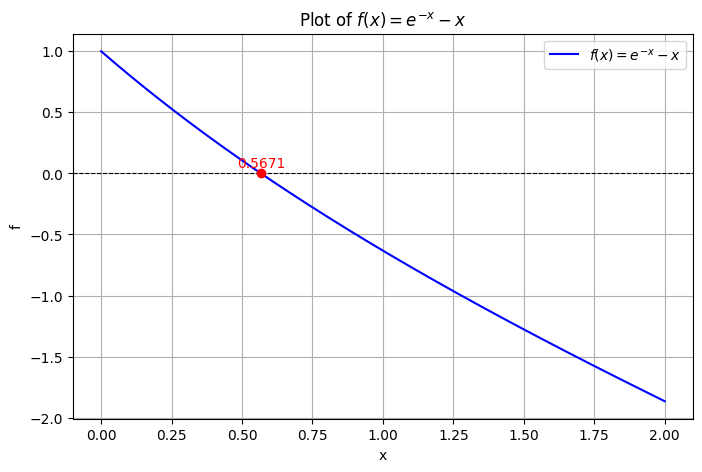

In [4]:
# Plot the function
x = np.linspace(0, 2, 500)
y = np.exp(-x) - x

plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.plot(x, y, label=r'$f(x) = e^{-x} - x$', color='blue')
plt.title("Plot of $f(x) = e^{-x} - x$")
plt.xlabel("x")
plt.ylabel("f")
plt.grid(True)
plt.legend()
plt.scatter(x_root, 0, color='red', zorder=3, label=f'Intersection at x = {x_root:.4f}')
plt.text(x_root, 0.05, f'{x_root:.4f}', ha='center', color='red', fontsize=10)
plt.show()

The **Intermediate Value Theorem** says that if $f(x)$ is a continuous function between $a$ and $b$, and ${\text{sign}}(f(a)) \ne {\text{sign}}(f(b))$, then there must be a $c$, such that $a < c < b$ and $f(c) = 0$. This is illustrated in the following figure. 

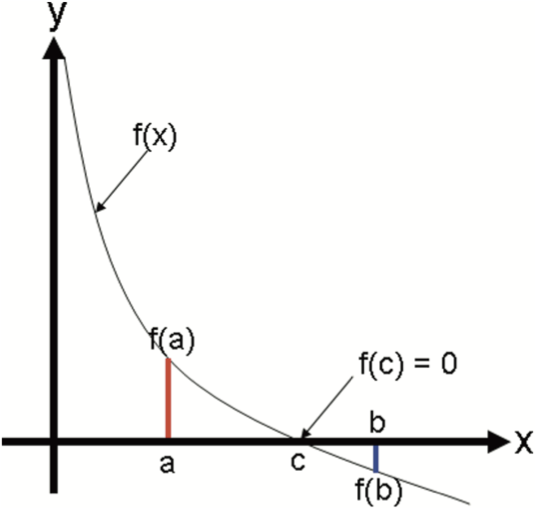!

The **bisection method** uses the intermediate value theorem iteratively to find roots. Let $f(x)$ be a continuous function, and $a$ and $b$ be real scalar values such that $a < b$. Assume, without loss of generality, that $f(a) > 0$ and $f(b) < 0$. Then by the intermediate value theorem, there must be a root on the open interval $(a,b)$. Now let $m = \frac{b + a}{2}$, the midpoint between and $a$ and $b$. If $f(m) = 0$ or is close enough, then $m$ is a root. If $f(m) > 0$, then $m$ is an improvement on the left bound, $a$, and there is guaranteed to be a root on the open interval $(m,b)$. If $f(m) < 0$, then $m$ is an improvement on the right bound, $b$, and there is guaranteed to be a root on the open interval $(a,m)$. This scenario is depicted in the following figure. 

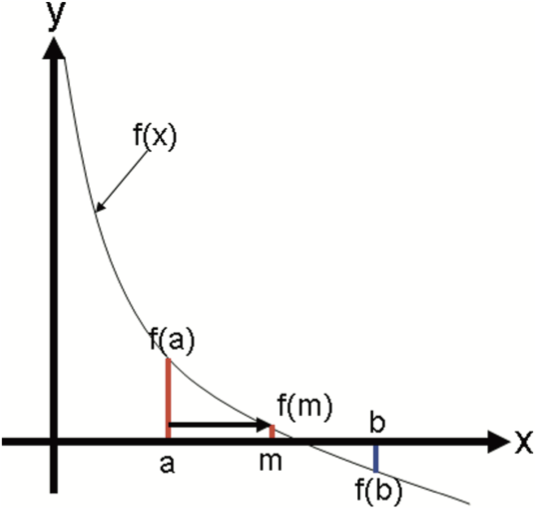

The process of updating $a$ and $b$ can be repeated until the error is acceptably low. 

**Function:** Program a function *my_bisection(f, a, b, tol)* that approximates a root $r$ of $f$, bounded by $a$ and $b$ to within $|f(\frac{a + b}{2})| < {\text{tol}}$. 

In [5]:
def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

**Problem:** The $0.567$ can be computed as the root of the function $f(x) = e^{-x} - x$. Starting at $a = 0$ and $b = 1$, use *my\_bisection* to approximate the $0.567$ to a tolerance of $|f(x)| < 0.01$. Verify that the results are close to a root by plugging the root back into the function.

In [6]:
root = my_bisection(f, 0, 1, 0.01)
print("root =", root)

root = 0.5625


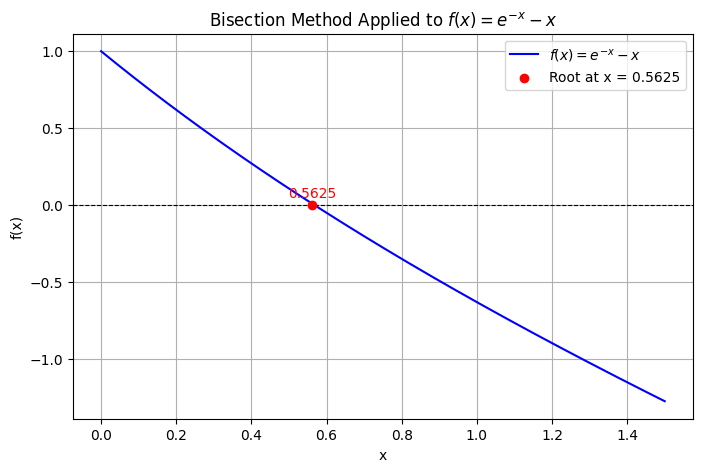

Root = 0.5625


In [7]:
# Generate x values for plotting
x = np.linspace(0, 1.5, 500)
y = np.exp(-x) - x

# Plot the function
plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.plot(x, y, label=r'$f(x) = e^{-x} - x$', color='blue')

# Highlight the root
plt.scatter(root, 0, color='red', zorder=3, label=f'Root at x = {root:.4f}')
plt.text(root, 0.05, f'{root:.4f}', ha='center', color='red', fontsize=10)

# Labels and grid
plt.title("Bisection Method Applied to $f(x) = e^{-x} - x$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# Print the root value
print("Root =", root)

Here’s the updated bisection method that prints the root at each iteration:

In [8]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2  # Compute midpoint
        print(f"Iteration {iterations + 1}: x = {c:.6f}, f(x) = {f(c):.6f}")  # Print current root guess

        if f(c) == 0:
            break  # Exact root found
        elif f(a) * f(c) < 0:
            b = c  # Update upper bound
        else:
            a = c  # Update lower bound
        
        iterations += 1  # Increment iteration count

    return (a + b) / 2, iterations  # Return the final root and iterations count

# Find the root using bisection
root_bisection, iter_bisection = bisection_method(f, 0, 1)
print(f"\nBisection Method: Root = {root_bisection:.6f}, Iterations = {iter_bisection}")

Iteration 1: x = 0.500000, f(x) = 0.106531
Iteration 2: x = 0.750000, f(x) = -0.277633
Iteration 3: x = 0.625000, f(x) = -0.089739
Iteration 4: x = 0.562500, f(x) = 0.007283
Iteration 5: x = 0.593750, f(x) = -0.041498
Iteration 6: x = 0.578125, f(x) = -0.017176
Iteration 7: x = 0.570312, f(x) = -0.004964
Iteration 8: x = 0.566406, f(x) = 0.001155
Iteration 9: x = 0.568359, f(x) = -0.001905
Iteration 10: x = 0.567383, f(x) = -0.000375
Iteration 11: x = 0.566895, f(x) = 0.000390
Iteration 12: x = 0.567139, f(x) = 0.000007
Iteration 13: x = 0.567261, f(x) = -0.000184
Iteration 14: x = 0.567200, f(x) = -0.000088
Iteration 15: x = 0.567169, f(x) = -0.000041
Iteration 16: x = 0.567154, f(x) = -0.000017
Iteration 17: x = 0.567146, f(x) = -0.000005
Iteration 18: x = 0.567142, f(x) = 0.000001
Iteration 19: x = 0.567144, f(x) = -0.000002

Bisection Method: Root = 0.567143, Iterations = 19
